<h1><b>Speed Improvement of PyTorch vs Plain Python for Matrix Multiplication</b></h1>

In [287]:
import random
random.seed(737);

m_vals = [m for m in range(10, 101, 10)];

def generateMatrices(m: int) -> tuple[list[list[float]], list[list[float]]]:
    W = [[random.random() for _ in range(m)] for _ in range(90)];
    X = [[random.random() for _ in range(110)] for _ in range(m)];

    return W, X;

In [288]:
def multiplyMatrices(A: list[list[float]], B: list[list[float]]) -> list[list[float]]:
    """
        Multiplies two matrices A and B using plain python for-loops.
    """
    if len(A[0]) != len(B):
        raise ValueError("Matrix dimensions are not compatible: number of columns of matrix A must equal the number of rows of matrix B!");

    # Init result matrix with all 0s
    C = [[0 for _ in range(len(B[0]))] for _ in range(len(A))];

    # Perform matrix multiplication
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j];
    
    return C;

In [289]:
import torch
import timeit

pyTimeResults = [];
tensorTimeResults = [];
for m in m_vals:
    print(f"Iteration with m value of {m}:");

    # Original list matrices
    W, X = generateMatrices(m);

    # Create the tensor matrices
    W_t = torch.tensor(W);
    X_t = torch.tensor(X);

    # Time the plain Python matrix multiplication
    pythonTime = %timeit -o multiplyMatrices(W, X);
    pyTimeResults.append(pythonTime.average);

    # Time the torch matrix multiplication
    tensorTime = %timeit -o torch.matmul(W_t, X_t);
    tensorTimeResults.append(tensorTime.average);


Iteration with m value of 10:
25.7 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
23.9 μs ± 2.73 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Iteration with m value of 20:
41.2 ms ± 262 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
23 μs ± 329 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Iteration with m value of 30:
57.2 ms ± 418 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
25 μs ± 1.34 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Iteration with m value of 40:
81.6 ms ± 8.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.1 μs ± 1.18 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Iteration with m value of 50:
96.7 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.7 μs ± 688 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Iteration with m value of 60:
111 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
32.2 μs ± 4.72 μs per loop (

In [290]:
print("Time results for timeit tests on regular python matrices:");
print(pyTimeResults);

Time results for timeit tests on regular python matrices:
[0.02568126999987206, 0.041184372857346066, 0.05717241571442823, 0.08162844285720243, 0.09673111714291736, 0.1107446571429526, 0.13369511714263355, 0.1497053142857372, 0.17162189714269646, 0.1831118428568256]


In [291]:
print("Time results for timeit tests on tensor matrices:");
print(tensorTimeResults);

Time results for timeit tests on tensor matrices:
[2.386830857140012e-05, 2.3007501428635025e-05, 2.5019531428759887e-05, 2.8062202857212727e-05, 2.870331714283176e-05, 3.223921571438301e-05, 3.049636571408233e-05, 3.221754571433329e-05, 3.8243817142730616e-05, 3.848362714291267e-05]


<h3><b>Visualizing the speed improvements</b></h2>

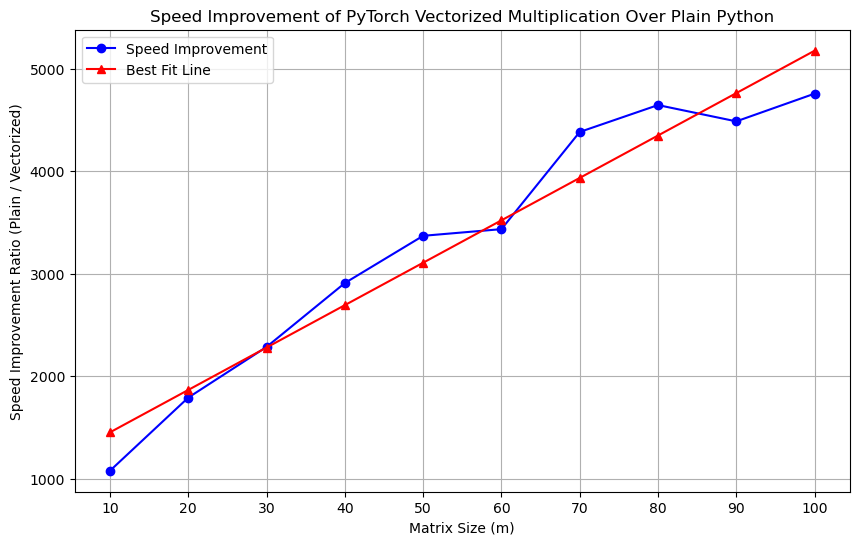

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

speedImprovementRatio = [pyTimeResults[i] / tensorTimeResults[i] for i in range(len(pyTimeResults))];

# Compute the line of best fit using least squares solution
A = np.column_stack((np.ones(len(m_vals)), m_vals)); # Col of 1s and m_vals
b = np.array(speedImprovementRatio); # Vertical vector of ratios

x_star = np.linalg.inv(A.T @ A) @ (A.T @ b); # x* = (A' * A)^-1 * A' * b

alpha = x_star[0];
beta = x_star[1];

bestFitLine = [alpha + beta * m for m in m_vals]; # Formulate the best fit line

plt.figure(figsize=(10, 6));
plt.plot(m_vals, speedImprovementRatio, marker='o', linestyle='-', color='b', label="Speed Improvement");
plt.plot(m_vals, bestFitLine, marker='^',linestyle='-', color='r', label="Best Fit Line");

plt.xticks(m_vals);
plt.xlabel("Matrix Size (m)");
plt.ylabel("Speed Improvement Ratio (Plain / Vectorized)");
plt.title("Speed Improvement of PyTorch Vectorized Multiplication Over Plain Python");
plt.grid(True);
plt.legend();
plt.show();